**EXPLORATORY DATA ANALYSIS** : **International Education Costs**

Tujuan : Melakukan Exploratory Data Analysis (EDA) terhadap dataset Biaya Pendidikan Internasional yang telah diupload (Kaggle)

Library : Pandas, Numpy, Seaborn, Matplotlib

Output : Dataset yang telah dibersihkan dan visualisasi data dari dataset tersebut

**IMPORT LIBRARY**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**UPLOAD DATASET**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving International_Education_Costs.csv to International_Education_Costs.csv


**LOAD DATASET**

In [3]:
df = pd.read_csv('International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


**DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [6]:
print(df.duplicated().sum())

0


In [9]:
df.shape

(907, 12)

In [10]:
print(df.isnull().sum())

Country              0
City                 0
University           0
Program              0
Level                0
Duration_Years       0
Tuition_USD          0
Living_Cost_Index    0
Rent_USD             0
Visa_Fee_USD         0
Insurance_USD        0
Exchange_Rate        0
dtype: int64


In [12]:
df.head()
df.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS**

In [7]:
(df.describe(include='all'))

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907,907,907,907,907,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
unique,71,556,622,92,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,UK,Singapore,University of Washington,Computer Science,Master,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,93,18,6,312,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,NaN,NaN,NaN,NaN,NaN,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,NaN,NaN,NaN,NaN,NaN,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,NaN,NaN,NaN,NaN,NaN,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000


In [30]:
df['Total_Cost_USD'] = (
    df['Tuition_USD'] +
    df['Rent_USD'] +
    df['Visa_Fee_USD'] +
    df['Insurance_USD']
)

print(df[['University', 'Total_Cost_USD']])

                         University  Total_Cost_USD
0                Harvard University           59260
1           Imperial College London           44285
2             University of Toronto           41235
3           University of Melbourne           44500
4    Technical University of Munich            2225
..                              ...             ...
902        University of Strasbourg            5949
903                            USIM            7720
904          King Faisal University            5800
905        University of Washington           53660
906        University of Nottingham           36085

[907 rows x 2 columns]


**Visualization of the Top 10 Countries with Highest Average Education Cost**

<ipython-input-18-8b0189b064db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost.values, y=avg_cost.index, palette='viridis')


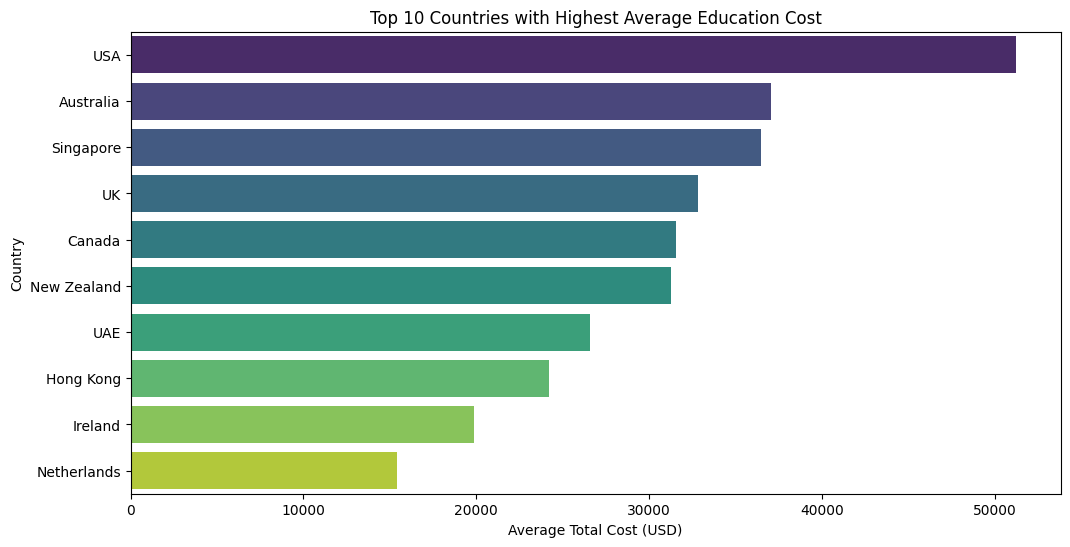

In [18]:
avg_cost = df.groupby('Country')['Total_Cost_USD'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_cost.values, y=avg_cost.index, palette='viridis')
plt.title("Top 10 Countries with Highest Average Education Cost")
plt.xlabel("Average Total Cost (USD)")
plt.ylabel("Country")
plt.show()

**Distribution of Education Costs in ASEAN Countries**

<ipython-input-19-e592b97eebea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_asean, x='Country', y='Total_Cost_USD', palette='Set2')


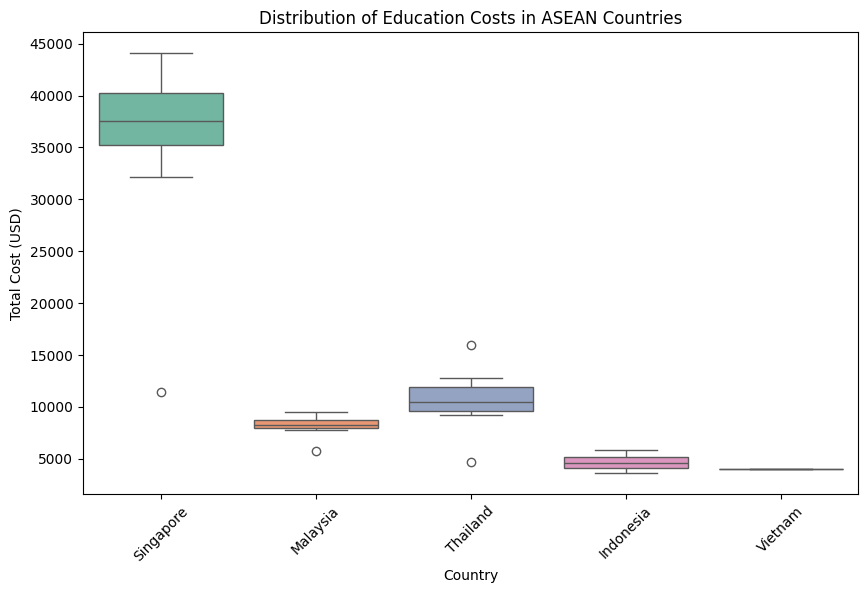

In [19]:
asean_countries = ['Indonesia', 'Malaysia', 'Singapore', 'Thailand', 'Vietnam', 'Philippines']
df_asean = df[df['Country'].isin(asean_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_asean, x='Country', y='Total_Cost_USD', palette='Set2')
plt.title("Distribution of Education Costs in ASEAN Countries")
plt.ylabel("Total Cost (USD)")
plt.xticks(rotation=45)
plt.show()

**Average Total Education Cost by Level of Study**

In [27]:
level_cost = df.groupby('Level')['Total_Cost_USD'].mean().reset_index()

<ipython-input-28-b3c471f9e523>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=level_cost, x='Level', y='Total_Cost_USD', palette='viridis')


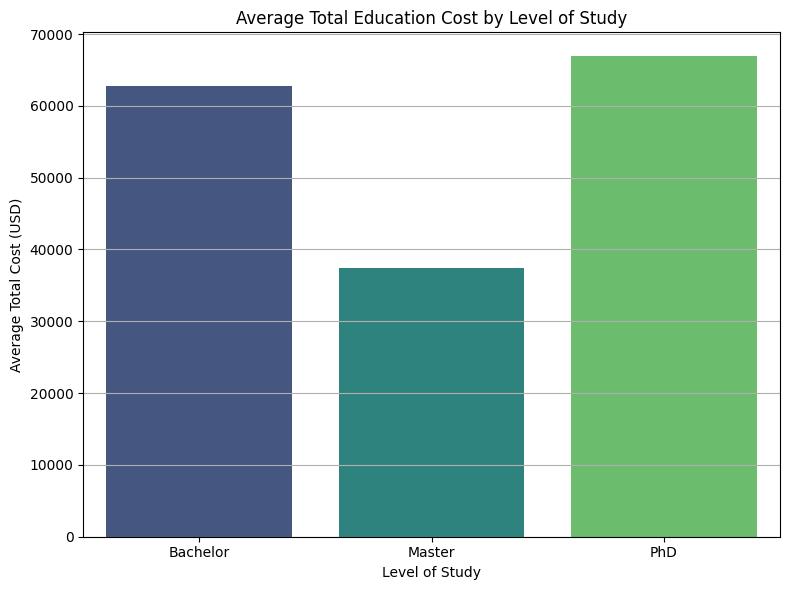

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(data=level_cost, x='Level', y='Total_Cost_USD', palette='viridis')

plt.title('Average Total Education Cost by Level of Study')
plt.xlabel('Level of Study')
plt.ylabel('Average Total Cost (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Proyek ini melakukan analisis eksploratif terhadap dataset biaya pendidikan internasional. Analisis di atas mencakup pembersihan data, mengidentifikasi negara-negara dengan biaya pendidikan tertinggi, distribusi biaya pendidikan di negara-negara ASEAN, dan rata-rata total biaya pendidikan menurut tingkat studi